In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Reading the data

In [2]:
suicide_df = pd.read_csv('suicide.csv', delimiter=",", encoding='utf-8')

Getting information about data

In [3]:
suicide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31756 entries, 0 to 31755
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             31756 non-null  object 
 1   year                31756 non-null  int64  
 2   sex                 31756 non-null  object 
 3   age                 31756 non-null  object 
 4   suicides_no         30556 non-null  float64
 5   population          31756 non-null  int64  
 6   suicides/100k pop   31756 non-null  float64
 7   country-year        31756 non-null  object 
 8   HDI for year        12300 non-null  float64
 9    gdp_for_year ($)   31756 non-null  object 
 10  gdp_per_capita ($)  31756 non-null  float64
 11  generation          31756 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 2.9+ MB


In [4]:
suicide_df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,31756.000000,30556.000000,3.175600e+04,31756.000000,12300.000000,31756.000000
mean,2003.395390,237.136242,7.217454e+06,11.716668,0.793666,17588.954606
std,9.760604,867.956107,5.799323e+07,21.590926,0.097480,19464.861140
min,1985.000000,0.000000,2.780000e+02,0.000000,0.377790,251.000000
25%,1996.000000,3.000000,1.288210e+05,0.370000,0.727000,3765.000000
50%,2004.000000,25.000000,5.468325e+05,4.285000,0.800457,10062.000000
75%,2011.000000,132.000000,2.908763e+06,14.560000,0.874000,25622.000000
max,2020.000000,22338.000000,1.411100e+09,515.092734,0.975114,126352.000000


Rename the columns

In [5]:
#remane the columns
suicide_df = suicide_df.rename(columns={'country':'Country',
                          'year':'Year',
                          'sex':'Gender',
                          'age':'Age',
                          'suicides_no':'SuicidesNo',
                          'population':'Population',
                          'suicides/100k pop':'Suicides100kPop',
                          'country-year':'CountryYear',
                          'HDI for year':'HDIForYear',
                          ' gdp_for_year ($) ':'GDPForYearMoney',
                          'gdp_per_capita ($)':'GDPPerCapital',
                          'generation':'Generation'})

Removing null values

In [6]:
suicide_df.isnull().sum()

Country                0
Year                   0
Gender                 0
Age                    0
SuicidesNo          1200
Population             0
Suicides100kPop        0
CountryYear            0
HDIForYear         19456
GDPForYearMoney        0
GDPPerCapital          0
Generation             0
dtype: int64

In [7]:
suicide_df = suicide_df.drop(['HDIForYear', 'CountryYear'], axis=1)

In [8]:
suicide_df.head()

,Country,Year,Gender,Age,SuicidesNo,Population,Suicides100kPop,GDPForYearMoney,GDPPerCapital,Generation
0,Albania,1987,male,15-24 years,21.0,312900,6.71,"2,15,66,24,900",796.0,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.19,"2,15,66,24,900",796.0,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.83,"2,15,66,24,900",796.0,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.59,"2,15,66,24,900",796.0,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.28,"2,15,66,24,900",796.0,Boomers


View the year range of the data

In [9]:
min_year=min(suicide_df.Year)
max_year=max(suicide_df.Year)
print('Min Year :',min_year)
print('Max Year :',max_year)

Min Year : 1985
Max Year : 2020


Question1. What is the suicide number for each generation? Which generation is more likely to commit suicide?

In [10]:
generation_data = suicide_df.groupby(['Generation'])['SuicidesNo'].sum().reset_index()
generation_data

,Generation,SuicidesNo
0,Boomers,2369301.0
1,G.I. Generation,697049.0
2,Generation X,1612926.0
3,Generation Z,15906.0
4,Millenials,623459.0
5,Silent,1927294.0


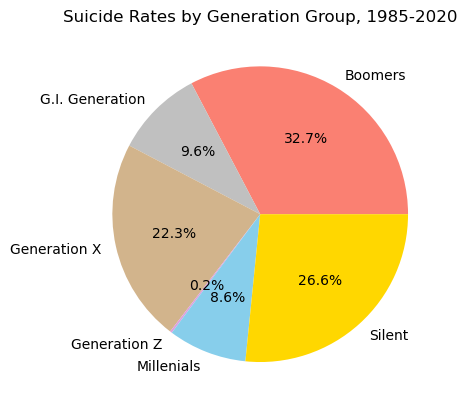

In [14]:
colors = ['salmon', 'silver', 'tan', 'plum','skyblue','gold']
generation = generation_data['Generation']
number = generation_data['SuicidesNo']
plt.pie(number, labels=generation, autopct='%1.1f%%',colors=colors)
plt.title('Suicide Rates by Generation Group, 1985-2020')
plt.show()

Question2. Trends of suicides from 1985 to 2020

In [15]:
year_data = suicide_df.groupby(['Year'])['SuicidesNo'].sum().reset_index()
year_data.head()

,Year,SuicidesNo
0,1985,116063.0
1,1986,120670.0
2,1987,126842.0
3,1988,121026.0
4,1989,160244.0


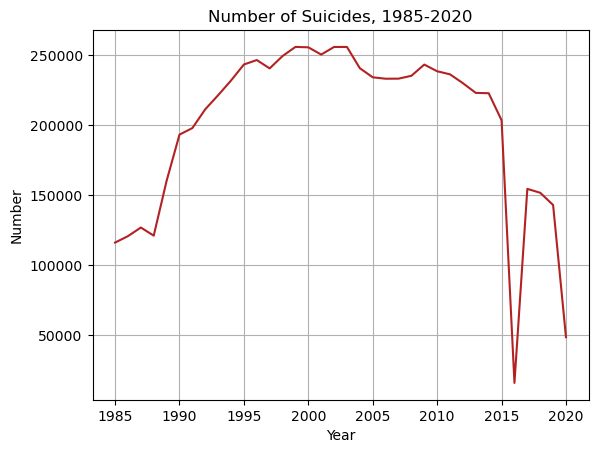

In [16]:
sns.lineplot(data=year_data, x='Year', y='SuicidesNo', ci=False, color='firebrick')
plt.title('Number of Suicides, 1985-2020')
plt.xlabel('Year')
plt.ylabel('Number')
plt.grid()
plt.show()

Question3. Number of Suicides, by Gender

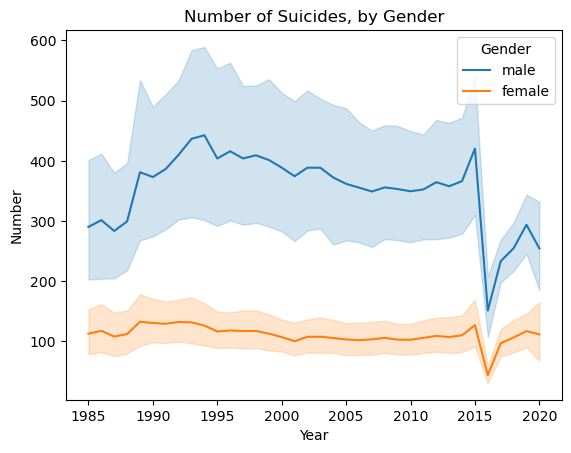

In [17]:
sns.lineplot(data=suicide_df, x='Year', y='SuicidesNo', hue='Gender')
plt.title('Number of Suicides, by Gender')
plt.xlabel('Year')
plt.ylabel('Number')
plt.show()

Question4. Compare top 10 countries in population and top 10 countries in suicides rates

In [18]:
top_population = suicide_df.groupby('Country').sum()['Population'].nlargest(10)
top_population

Country
China, Hong Kong SAR        67413840000
United States of America    15741496320
Brazil                      14979902356
Russian Federation          10620250596
Japan                        9761148844
Mexico                       8748199943
United States                8054027201
Philippines                  6319617595
Germany                      6006675016
Egypt                        5023367472
Name: Population, dtype: int64

In [19]:
top_suicides = suicide_df.groupby('Country').sum()['SuicidesNo'].nlargest(10)
top_suicides

Country
Russian Federation    1241820.0
United States         1034013.0
Japan                  846698.0
Ukraine                338253.0
France                 329127.0
Germany                322286.0
Republic of Korea      291207.0
Brazil                 255979.0
Poland                 153526.0
United Kingdom         152238.0
Name: SuicidesNo, dtype: float64